# RNN

This example will illustrate how to build and train an RNN 
 for text classification- Classifying spam and non spam(Ham) Messages from a sequence of messages 

In [ ]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model
#from sklearn.model_selection import train_test_split
#from keras.layers import Dense, Embedding

#from keras.preprocessing.text import Tokenizer
#from keras.preprocessing import sequence

# helps in text preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# helps in model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Embedding
from tensorflow.keras.optimizers import RMSprop

# split data into train and test set
from sklearn.model_selection import train_test_split

# Metrics
from sklearn import metrics                            # sklearn metrics module implements utility functions to measure classification performance
from sklearn.metrics import confusion_matrix           # Computes confusion matrix to evaluate the accuracy of a classification.
from sklearn.metrics import accuracy_score             # Performance measure – Accuracy
from sklearn.metrics import precision_score            # Computes the precision: the ability of the classifier not to label as positive a sample that is negative
from sklearn.metrics import recall_score               # Computes the recall: the ability of the classifier to find all the positive samples
from sklearn.metrics import f1_score                   # Computes the weighted average of the precision and recall
from sklearn.metrics import classification_report

In [ ]:
# Import the data set as a pandas DataFrame
df = pd.read_csv('spam.csv', delimiter=',', encoding='latin-1')
df.head(8)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

**axis 0” represents rows and “axis 1” represents columns**

In [ ]:
# removing Non useful columns
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


C:\Users\Lappy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


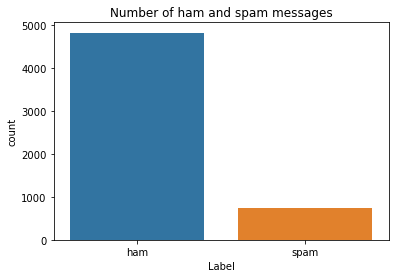

In [ ]:
# Plotting 
sns.countplot(df.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam messages');

In [ ]:
# Mapping spam as 1 and Non spam as 0
df['v1'] = df['v1'].map( {'spam': 1, 'ham': 0} )
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
X = df['v2'].values
y = df['v1'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
X_train.shape

(4457,)

In [ ]:
X_test.shape

(1115,)

Text Pre-Processing

1. Tokenization

2. Text Encoding

3. Padding 

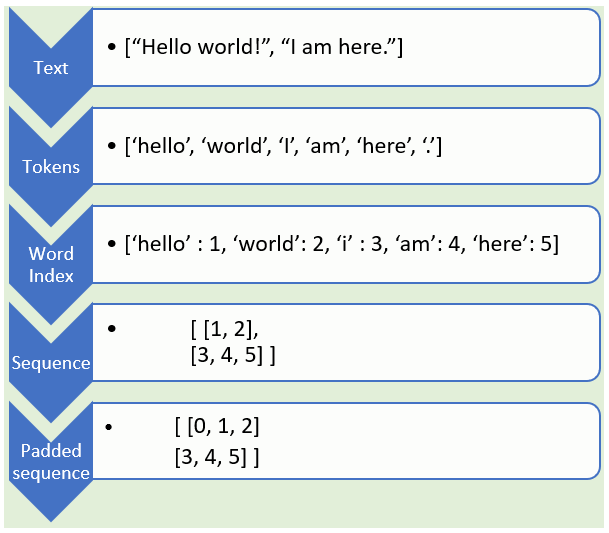

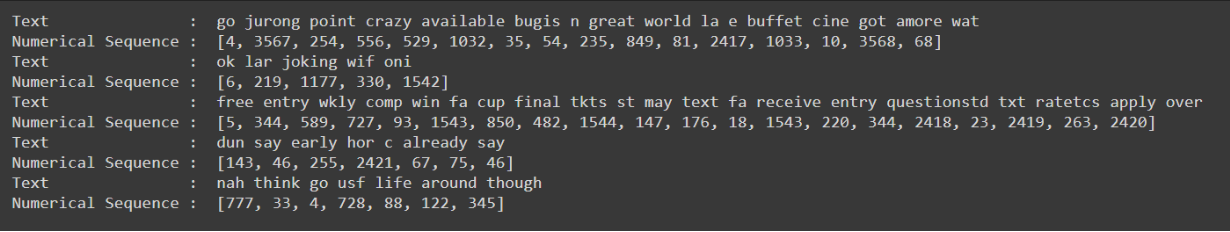

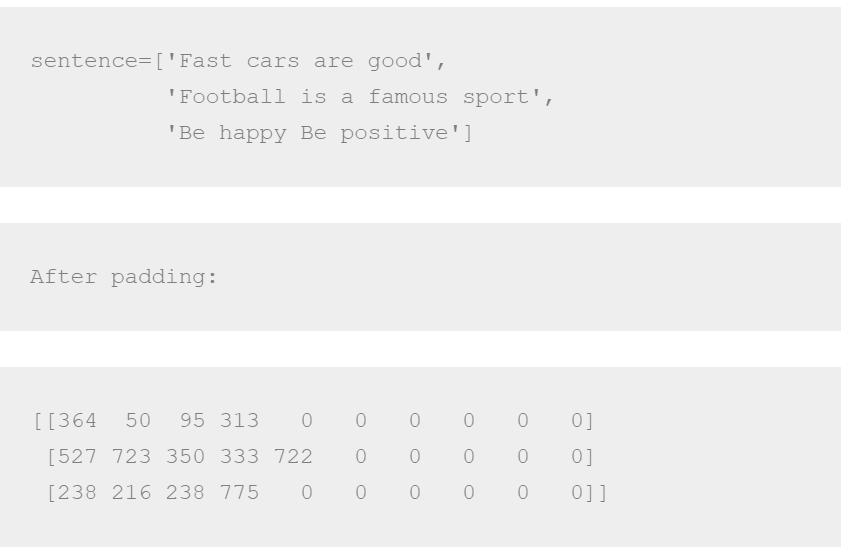

In [ ]:
t = Tokenizer()
t.fit_on_texts(X_train)
encoded_train = t.texts_to_sequences(X_train)
encoded_test = t.texts_to_sequences(X_test)
print(encoded_train[0:4])

[[38, 30, 8, 5, 273, 1989, 81, 116, 26, 11, 1656, 322, 10, 53, 18, 299, 30, 349, 1990], [799, 15, 2555, 1442, 1127, 192, 2556, 171, 12, 98, 1991, 44, 195, 1657, 2557, 1992, 2558, 21, 9, 4, 203, 1025, 225], [113, 83, 1443, 4, 672, 350, 2, 3794, 3795], [673, 1, 1993, 3796, 3797, 40, 41, 3798]]


In [ ]:
max_length=8
padded_train = pad_sequences(encoded_train, maxlen=max_length, padding='post')
padded_test = pad_sequences(encoded_test, maxlen=max_length, padding='post')
padded_train.shape

[[ 322   10   53 ...   30  349 1990]
 [1992 2558   21 ...  203 1025  225]
 [  83 1443    4 ...    2 3794 3795]
 ...
 [1477   30 2063 ...  239   30 2064]
 [ 763 1679 1161 ...    0    0    0]
 [   8  155   20 ...    8  290  175]]


In [ ]:
vocab_size = len(t.word_index) + 1

# define the model
model = Sequential()

# Model is Built with vocabulary size as the input size.
model.add(Embedding(vocab_size, 24, input_length=max_length))
model.add(SimpleRNN(24, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# fit the model
model.fit(x=padded_train, y=y_train, epochs=50,
         validation_data=(padded_test, y_test), verbose=1)

Epoch 1/50
140/140 [==============================] - 1s 6ms/step - loss: 0.2243 - accuracy: 0.9212 - val_loss: 0.1107 - val_accuracy: 0.9641
Epoch 2/50
140/140 [==============================] - 1s 4ms/step - loss: 0.0679 - accuracy: 0.9780 - val_loss: 0.0718 - val_accuracy: 0.9803
Epoch 3/50
140/140 [==============================] - 1s 4ms/step - loss: 0.0426 - accuracy: 0.9863 - val_loss: 0.0720 - val_accuracy: 0.9794
Epoch 4/50
140/140 [==============================] - 1s 4ms/step - loss: 0.0318 - accuracy: 0.9897 - val_loss: 0.0686 - val_accuracy: 0.9830
Epoch 5/50
140/140 [==============================] - 1s 4ms/step - loss: 0.0238 - accuracy: 0.9933 - val_loss: 0.0702 - val_accuracy: 0.9821
Epoch 6/50
140/140 [==============================] - 1s 4ms/step - loss: 0.0195 - accuracy: 0.9939 - val_loss: 0.0710 - val_accuracy: 0.9830
Epoch 7/50
140/140 [==============================] - 1s 4ms/step - loss: 0.0136 - accuracy: 0.9957 - val_loss: 0.0714 - val_accuracy: 0.9830
Epoch 

Model is trained and validated for test dataset with 50 epochs.

In [ ]:
# prediction
pred = (model.predict(padded_test) > 0.5).astype("int32")
pred

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])


 Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.96      0.87      0.91       150

    accuracy                           0.98      1115
   macro avg       0.97      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Accuracy   :  0.98
Precision  :  0.96
Recall     :  0.87
F1 score   :  0.91


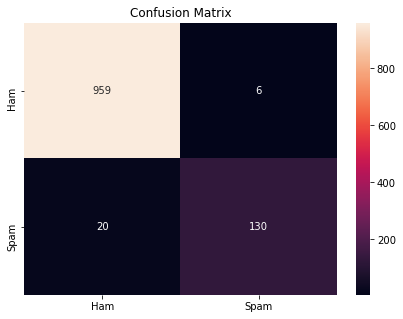

In [ ]:
cm=confusion_matrix(y_test, pred,labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Ham","Spam"]],
                  columns = [i for i in ["Ham","Spam"]])
plt.figure(figsize = (7,5))
plt.title('Confusion Matrix')
sns.heatmap(df_cm, annot=True ,fmt='g');

# Classification Report
print('\n Classification Report : \n',metrics.classification_report(y_test, pred))
a = accuracy_score(y_test, pred)
p = precision_score(y_test, pred)
r = recall_score(y_test, pred)
f = f1_score(y_test, pred)
print("Accuracy   : ",round(a,2))
print("Precision  : ",round(p,2))
print("Recall     : ",round(r,2))
print("F1 score   : ",round(f,2))

In [ ]:
# prdeiction of an new input

sms = ["hello! how are you? im visiting mom next week"]
#sms = ["You've Won! Winning an unexpected prize sounds great"]
sms_proc = t.texts_to_sequences(sms)
sms_proc = pad_sequences(sms_proc, maxlen=max_length, padding='post')
pred = (model.predict(sms_proc)>0.5).astype("int32").item()
print(pred)

0
